# EDSA - Climate Change Belief Analysis 2021

### Summary
to be added once everything is finalized

### Contents
1. Introduction
2. Import Packages
3. Loading Data and Exploratory Data Analysis (EDA)
4. Pre-Processing and further EDA
5. Model Building
    * Model 1 2 3 etc
    *
6. Model Assessment
    * Comparisons of models
    *
7. Conclusion 

### 1. Introduction
Climate change is the phenomenon of an increasing number of greenhouse gases within the earth's atmosphere that is accompanied by major shifts in weather patterns. This is largely human-induced and is as a result of increased levels of atmospheric carbon dioxide produced by the use of fossil fuels for basic living neccesities as well as large industrial processes. The effects of climate change affect the livelihoods of both people and animals and is experienced via intense drought, storms, heat waves, rising sea levels, melting glaciers and warming oceans, Furthermore, as climate change worsens, dangerous weather events are becoming more frequent or severe.

Over several years, many companies have attempted to implemt startegies around lessening their environmental impact or carbon footprint. They offer products and services that are environmentally friendly and sustainable, in line with their values and ideals. However, problems they experience include guaging how their products may be recieved based on people's views and opinions of climate change. By determining how people perceive climate change and whether or not they believe it is a real threat, these companies can improve on their market research efforts. Additionally, access to a large collection of consumer sentiments that also spans multiple demographic and geographic categories will influence company insights and their future marketing strategies allowing them to find the right target market to direct their products and efforts toward.

In the context of climate change and sustainable companies, Team_TS1 aim to provide a means for such companies to determine the views or sentiments of people towards climate change. To do this, tweets pertaining to climate change will be looked at and used to train a classification model in order to accurately classify the opinions behind those tweets, into those who believe in climate change and those who do not. This notebook details the work flow of Team_TS1 in building, training and assessing different classifier models to provide a suitable solution that can be implemented in future marketing strategies of climate concious companies. 

### 2. Import Packages
To carry out EDA, model building and assessment of model performance

In [1]:
# Numpy and Pandas
import numpy as np
import pandas as pd

# Visualisations
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Scikit Learn 
from sklearn.metrics import roc_auc_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import f1_score

### 3. Loading Data and Exploratory Data Analysis (EDA)
The data is provided in two files: train.csv and test_with_no_labels.csv and pertains to climate change tweets collected between Apr 27, 2015 and Feb 21, 2018. The train.csv will be used to train the classifier model and the test_no_labels.csv will be used to test the model's classifying accuracy.

**3.1. Training Dataset**

The training set has 15819 rows and 3 columns, sentiment, made up of integer type data, message, made up of object type data and tweetid, made up of integer type data. Each row represents one observation and each column, a feature. 

**Columns:**
* **message** : the written tweet, on climate change.
* **tweetid** : identifier of a status/message on twitter
* **sentiment** : expresses the view/opinion of climate change (Belief or Disbelief in  climate change, ranges from -1 to 2)
        * -1. Anti - Climate Change: the tweet does not believe in man-made climate change
        * 0. Neutral: the tweet neither supports nor refutes the belief of man-made climate change 
        * 1. Pro - Climate Change: the tweet supports the belief of man-made climate change
        * 2. News : the tweet links to factual news about climate change

In [2]:
# loading and reading train.csv to a Dataframe
train_csv = pd.read_csv('train.csv')
train_df = pd.DataFrame(train_csv)

In [3]:
# Overview of the train_df dataset
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15819 entries, 0 to 15818
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   sentiment  15819 non-null  int64 
 1   message    15819 non-null  object
 2   tweetid    15819 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 370.9+ KB


In [4]:
# View first five rows of train_df
train_df.head()

,sentiment,message,tweetid
0,1,PolySciMajor EPA chief doesn't think carbon di...,625221
1,1,It's not like we lack evidence of anthropogeni...,126103
2,2,RT @RawStory: Researchers say we have three ye...,698562
3,1,#TodayinMaker# WIRED : 2016 was a pivotal year...,573736
4,1,"RT @SoyNovioDeTodas: It's 2016, and a racist, ...",466954


**3.2. Testing Dataset**

The testing set has 10546 rows and 2 columns; message and tweetid. The sentiment is to be predicted by classification.

In [5]:
# loading and reading test_with_no_labels.csv to a Dataframe
test_csv = pd.read_csv('test_with_no_labels.csv')
test_df = pd.DataFrame(test_csv)
#test_id = test_df['tweetid']
#test = test_df.drop('tweetid', axis=1)

In [6]:
# Overview of the test_df dataset
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10546 entries, 0 to 10545
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   message  10546 non-null  object
 1   tweetid  10546 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 164.9+ KB


In [7]:
# View first five rows of test_df
test_df.head()

,message,tweetid
0,Europe will now be looking to China to make su...,169760
1,Combine this with the polling of staffers re c...,35326
2,"The scary, unimpeachable evidence that climate...",224985
3,@Karoli @morgfair @OsborneInk @dailykos \nPuti...,476263
4,RT @FakeWillMoore: 'Female orgasms cause globa...,872928


**3.3. EDA of Training Data**

**Distribution of the Response**

The distribution of the label variable (sentiment) provides insight into the frequencies per category of the sentiment (-1 to 2) expressed by each tweet. This gives an indication of the more popular vs unpopular opinions on climate change and suggests what*. Given the categorical nature of this variable a countplot provides the best insight into the frequencies for each category.

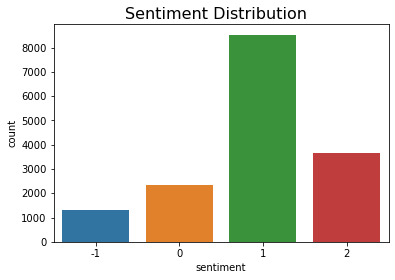

In [20]:
# Count plot distribution of sentiments expressed by each tweet
sns.countplot(x = train_df['sentiment'], data = train_df)
plt.suptitle('Sentiment Distribution', y = 0.94, fontsize=16)
plt.show()

The distribution of sentiments shows a clear difference in the frequencies observed for each sentiment, with the 'Pro' climate change tweets making up majority of the opinions expressed within this data set at over 8000 counts. 'Anti' climate changes tweets make up the lowest number of opinons with just over 1000 counts and with more people having a neutral response towards climate change than dibelieving in it. The number of News/factual tweets is higher than both that of 'Anti' and 'Neutral' views over 3000 views. 

The following table of value counts further describes the difference in frequency between each sentiment.

In [24]:
# Total number of observations for each sentiment
sentiment_counts = pd.DataFrame(train_df['sentiment'].value_counts())
sentiment_counts['View'] = ['Pro', 'News/Factual', 'Neutral', 'Anti']
sentiment_counts.sort_index(axis=1)

,View,sentiment
1,Pro,8530
2,News/Factual,3640
0,Neutral,2353
-1,Anti,1296


**Features / Preditors**

suggestions for EDA;
* look at handles and see if people tweeted more than once, how to deal with that etc?

### 4. Pre-Processing and further EDA

### 5. Model Building 

### 6. Model Assessment 

### 7. Conclusion